In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dim = (600,400)

In [37]:
detector = cv2.CascadeClassifier("../haarcascade_frontalface_default.xml")

In [38]:
import dlib
from imutils import face_utils

In [39]:
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")
dlibDetector = dlib.get_frontal_face_detector()

In [40]:
def compute(ptA, ptB):
    dist = np.linalg.norm(ptA - ptB)
    return dist


def EAR(a, b, c, d, e, f):
    up = compute(b, d) + compute(c, e)
    down = compute(a, f)
    ratio = up / (2.0 * down)

    return ratio

In [41]:
def __draw_label(img, text, pos, bg_color):
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.4
    color = (255, 255, 255)
    thickness = cv2.FILLED
    margin = 2
    txt_size = cv2.getTextSize(text, font_face, scale, thickness)

    end_x = pos[0] + txt_size[0][0] + margin
    end_y = pos[1] - txt_size[0][1] - margin

    cv2.rectangle(img, pos, (end_x, end_y), bg_color, thickness)
    cv2.putText(img, text, pos, font_face, scale, color, 1, cv2.LINE_AA)

In [42]:
EAR_Values = list()
# cap = cv2.VideoCapture('../Video Data for research/20220407_141535.mp4')
cap = cv2.VideoCapture(0)
# if (cap.isOpened()== False):
#     print("Error opening video file")
i = 0
while(i<80):    
# while(cap.isOpened()):
    i = i+1
    font = cv2.FONT_HERSHEY_SIMPLEX
    ret, frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector.detectMultiScale(frame,1.3,5)
        img = frame.copy()
        text = "EAR: "
        if(len(faces)):
            x,y,w,h = faces[0]
            img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),2)
            a = dlib.rectangle(left=x, top=y, right=x+w, bottom=y+h)
            landmarks = predictor(gray, a)
            landmarks = face_utils.shape_to_np(landmarks)
            left_blink = EAR(landmarks[36], landmarks[37],landmarks[38], landmarks[41], landmarks[40], landmarks[39])
            right_blink = EAR(landmarks[42], landmarks[43],landmarks[44], landmarks[47], landmarks[46], landmarks[45])
            text = text + str((left_blink+right_blink)/2)
#             print(text)
            EAR_Values.append((left_blink+right_blink)/2)
            for n in range(0, 68):
                (x, y) = landmarks[n]
                cv2.circle(img, (x, y), 1, (255, 255, 255), -1)  
#         for face in faces:
#             x,y,w,h = face
#             img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),2)
#             landmarks = predictor(gray, face)
#             landmarks = face_utils.shape_to_np(landmarks)
        resizedFrame = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        __draw_label(resizedFrame, text, (20,20), (0,0,0))
        cv2.imshow('Frame', resizedFrame)
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else: 
        break
        
cap.release()
cv2.destroyAllWindows()

In [43]:
from statistics import mean
mean(EAR_Values)

0.30335393055770793

In [44]:
import seaborn as sns

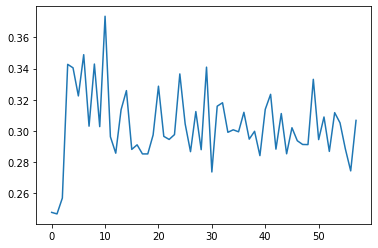

In [45]:
plt.plot(EAR_Values)

In [47]:
# sns.lineplot(x=range(0,80),y=EAR_Values)